# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Objetivo del proyecto:**  
El desarrollo de este proyecto tiene como propósito determinar con evidencia estadística cuál de los dos planes de telefonía ('surf' y 'ultimate') aporta, en promedio, mayores ingresos a la compañía operadora de telecomunicaciones Megaline. Para esto, en primer lugar realizamos una revisión general de los datos con el fin de determinar si nos hace falta información o si es necesario un tratamiento previo. Seguiremos con la evaluación y análisis de los comportamientos de los usuarios alrededor de los tres servicios que ofrecen los planes de telefonía (llamadas, mensajes e internet). Con los resultados del proceso anterior, determinaremos los ingresos mensuales de los usuarios de cada plan. Con esta información procederemos a realizar pruebas estadísticas que respalden nuestras conclusiones respecto a cuál plan es más rentable.


## Inicialización

In [8]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

## Cargar datos

In [9]:
# Carga los archivos de datos en diferentes DataFrames
#Lecturas de los archivos ".csv" para crear los respectivos dataframes
calls=pd.read_csv("dataset/megaline_calls.csv")
internet=pd.read_csv("dataset/megaline_internet.csv")
messages=pd.read_csv("dataset/megaline_messages.csv")
plans=pd.read_csv("dataset/megaline_plans.csv")
users=pd.read_csv("dataset/megaline_users.csv")

## Preparar los datos

A continuación vamos a revisar la descripción general de los dataframes generados a partir de los archivos ".csv" y observaremos la estructura de cada uno mediante un muestreo usando el método ".sample()". Determinaremos si los nombres de las columnas siguen la regla *snake_case*, la existencia de valores ausentes, así como de valores duplicados. Evaluaremos que pre-tratamiento es necesario para facilitar el manejo de la información a futuro, como por ejemplo, cambiar el tipo de dato de alguna columna.

## Tarifas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
#Se utiliza el método ".info()" para obtener la información general del dataframe
plans.info()
#No se observan valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [11]:
# Imprime una muestra de los datos para las tarifas
#Solo existen dos registros en este dataframe. Uno por cada plan de telefonía disponible
#Se genera una muestra de los registros del dataframe con el método ".head()"
plans.head()
#Los nombres de las columnas siguen la regla "snake_case"

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En este dataframe solo existen dos registros. Un registro por cada plan de telefonía disponible con Megaline. En la información se observa que los nombres de la columnas siguen la regla *snake_case*. No se considera necesario modificar los tipos de datos. En este caso, es posible verificar que no existen valores ausentes ni datos duplicados.

## Corregir datos

In [12]:
#Mediante el método ".duplicated()" se verifica que no hay duplicados
plans.duplicated().sum()

np.int64(0)

In [13]:
#Mediante el método ".isna()" se verifica que no hay valores ausentes
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

## Enriquecer los datos

In [14]:
#No se considera necesario ejecutar ninguna acción adicional sobre este dataframe hasta este punto

## Usuarios/as

In [15]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
#Se utiliza el método ".info()" para obtener la información general del dataframe
users.info()
#Hay valores ausentes en la columna "churn_date"
#Los nombres de las columnas siguen la regla "snake_case"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
# Imprime una muestra de datos para usuarios
#Se genera una muestra de los registros del dataframe con el método ".sample()"
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
154,1154,Humberto,Pruitt,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-07-18,ultimate,NaN
437,1437,Louis,Neal,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-12,surf,NaN
483,1483,Miguel,Farrell,35,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-25,surf,NaN
196,1196,Noel,Dawson,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-14,ultimate,NaN
288,1288,Jenette,Rush,60,"Las Vegas-Henderson-Paradise, NV MSA",2018-07-18,surf,NaN
451,1451,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10
445,1445,Elodia,Donovan,71,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,ultimate,NaN
247,1247,Marion,Singleton,75,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-04-12,ultimate,NaN
359,1359,Sherley,Norris,33,"Colorado Springs, CO MSA",2018-02-08,surf,NaN
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN


Se observa que los nombres de la columnas siguen la regla *snake_case*. Para la columna "reg_date" se considera necesario cambiar el tipo de dato a *datetime*. Se puede observar que existen valores ausentes en la columna "churn_date", estos indican específicamente que el usuario tiene un plan activo con Megaline. Se podría plantear la opción de separar la información contenida en la columna "city" o extraer en otra columna el indicador del área a la que pertenece el usuario para facilitar la identificación o división de los datos por regiones. Se verificará que no existan registros duplicados.

### Corregir los datos

In [17]:
#Mediante el método ".duplicated()" se verifica que no hay duplicados
users.duplicated().sum()

np.int64(0)

In [18]:
#Se verifica que no hayan duplicados implícitos bajo el mismo id
users["user_id"].duplicated().sum()

np.int64(0)

In [19]:
#Mediante el método ".isna()" se verifica que hay valores ausentes en la columna "churn_date"
users["churn_date"].isna().sum()

np.int64(466)

In [20]:
#La columna con información de fechas se convierte al tipo datetime
users["reg_date"]=pd.to_datetime(users["reg_date"], format="%Y-%m-%d")

### Enriquecer los datos

In [21]:
#No se considera necesario ejecutar ninguna acción adicional sobre este dataframe hasta este punto

## Llamadas

In [22]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
#Se utiliza el método ".info()" para obtener la información general del dataframe
calls.info()
#No se observan valores ausentes
#Los nombres de las columnas siguen la regla "snake_case"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [23]:
# Imprime una muestra de datos para las llamadas
#Se genera una muestra de los registros del dataframe con el método ".sample()"
calls.sample(10)

,id,user_id,call_date,duration
30280,1113_643,1113,2018-11-19,0.00
35211,1132_620,1132,2018-10-01,0.00
65837,1238_48,1238,2018-12-02,15.82
16817,1065_185,1065,2018-12-21,7.31
16147,1064_5,1064,2018-07-17,12.98
30447,1114_252,1114,2018-09-10,6.23
74294,1263_278,1263,2018-03-21,0.00
64193,1232_494,1232,2018-08-08,7.16
13594,1057_473,1057,2018-11-27,0.00
124957,1440_473,1440,2018-06-17,1.77


En la información se observa que los nombres de la columnas siguen la regla *snake_case*. Para la columna "call_date" se considera necesario cambiar el tipo de dato a *datetime*. Se puede observar que no existen valores ausentes. Se verificará que no existan registros duplicados.

### Corregir los datos

In [24]:
#Mediante el método ".duplicated()" se verifica que no hay duplicados
calls.duplicated().sum()

np.int64(0)

In [25]:
#Se verifica que no hayan duplicados implícitos bajo el mismo id
calls["id"].duplicated().sum()

np.int64(0)

In [26]:
#Mediante el método ".isna()" se verifica que no hay valores ausentes
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [27]:
#La columna con información de fechas se convierte al tipo datetime
calls["call_date"]=pd.to_datetime(calls["call_date"], format="%Y-%m-%d")

### Enriquecer los datos

Para evaluar estadísticas de las llamadas para los meses del año 2018, creamos una columna adicional que indica el mes de la actividad del usuario. En este caso, fue útil convertir el tipo de dato a *datetime* dado que podemos extraer fácilmente el número del mes de la fecha. Adicionalmente, procedemos a redondear los segundos a minutos en la columna "duration" para cada registro de llamada, siguiendo la política del plan de telefonía de Megaline.

In [28]:
#Se crea una columna con el mes en el que el usuario realiza una llamada
calls["month"]=calls["call_date"].dt.month
#Se redondea la duración de cada llamada al entero inmediatamente mayor mediante la función "np.ceil()".
calls["duration"]=np.ceil(calls["duration"])

## Mensajes

In [29]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
#Se utiliza el método ".info()" para obtener la información general del dataframe
messages.info()
#No se observan valore ausentes
#Los nombres de las columnas siguen la regla "snake_case"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
# Imprime una muestra de datos para los mensajes
#Se genera una muestra de los registros del dataframe con el método ".sample()"
messages.sample(10)

,id,user_id,message_date
61277,1384_374,1384,2018-12-28
29751,1183_146,1183,2018-11-28
43711,1291_14,1291,2018-04-27
4026,1039_124,1039,2018-12-01
51994,1335_586,1335,2018-12-27
52077,1336_11,1336,2018-06-27
59293,1374_467,1374,2018-06-19
52681,1336_706,1336,2018-11-03
50473,1329_452,1329,2018-12-29
45775,1312_259,1312,2018-08-29


En la información se observa que los nombres de la columnas siguen la regla *snake_case*. Para la columna "message_date" se considera necesario cambiar el tipo de dato a *datetime*. Se puede observar que no existen valores ausentes. Se verificará que no existan registros duplicados.

### Corregir los datos

In [31]:
#Mediante el método ".duplicated()" se verifica que no hay duplicados
messages.duplicated().sum()

np.int64(0)

In [32]:
#Se verifica que no hayan duplicados implícitos bajo el mismo id
messages["id"].duplicated().sum()

np.int64(0)

In [33]:
#Mediante el método ".isna()" se verifica que no hay valores ausentes
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [34]:
#La columna con información de fechas se convierte al tipo datetime
messages["message_date"]=pd.to_datetime(messages["message_date"], format="%Y-%m-%d")

### Enriquecer los datos

Para evaluar estadísticas de los mensajes para los meses del año 2018, creamos una columna adicional que indica el mes de la actividad del usuario. En este caso, fue útil convertir el tipo de dato a *datetime* dado que podemos extraer fácilmente el número del mes de la fecha.

In [35]:
#Se crea una columna con el mes en el que el usuario manda un mensaje de texto
messages["month"]=messages["message_date"].dt.month

## Internet

In [36]:
# Imprime la información general/resumida sobre el DataFrame de internet
#Se utiliza el método ".info()" para obtener la información general del dataframe
internet.info()
#No se observan valores ausentes
#Los nombres de las columnas siguen la regla "snake_case"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [37]:
# Imprime una muestra de datos para el tráfico de internet
#Se genera una muestra de los registros del dataframe con el método ".sample()"
internet.sample(10)

,id,user_id,session_date,mb_used
94717,1440_355,1440,2018-09-02,587.62
6710,1038_198,1038,2018-12-15,523.64
36278,1163_259,1163,2018-12-10,681.98
39398,1177_33,1177,2018-11-21,378.79
65573,1302_119,1302,2018-09-30,220.94
65495,1302_41,1302,2018-10-07,639.68
63133,1291_258,1291,2018-07-09,69.33
87970,1406_287,1406,2018-07-04,53.41
64267,1295_110,1295,2018-12-22,123.09
53786,1243_88,1243,2018-12-02,496.56


En la información se observa que los nombres de la columnas siguen la regla *snake_case*. Para la columna "session_date" se considera necesario cambiar el tipo de dato a *datetime*. Se verificará que no existan registros duplicados. Se puede observar que no existen valores ausentes.

### Corregir los datos

In [38]:
#Mediante el método ".duplicated()" se verifica que no hay duplicados
internet.duplicated().sum()

np.int64(0)

In [39]:
#Se verifica que no hayan duplicados implícitos
internet["id"].duplicated().sum()

np.int64(0)

In [40]:
#Mediante el método ".isna()" se verifica que no hay valores ausentes
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [41]:
#La columna con información de fechas se convierte al tipo datetime
internet["session_date"]=pd.to_datetime(internet["session_date"], format="%Y-%m-%d")

### Enriquecer los datos

Para evaluar estadísticas del consumo de internet para los meses del año 2018, creamos una columna adicional que indica el mes de la actividad del usuario. En este caso, fue útil convertir el tipo de dato a *datetime* dado que podemos extraer fácilmente el número del mes de la fecha. Hasta este momento no aplicamos la política de Megaline para el consumo de internet, dado que necesitamos consolidar el consumo mensual para cada usuario. Cuando lo tengamos, convertiremos el consumo de *mb* a *GB* dividiendo entre el factor 1024, después vamos redondear el valor para obtener un número entero de *GB*.

In [42]:
#Se crea una columna con el mes en el que el usuario usa internet
internet["month"]=internet["session_date"].dt.month

## Estudiar las condiciones de las tarifas

A continuación se pueden detallar las condiciones para cada plan de telefonía ofrecido por Megaline. Se puede ver el límite de consumo para cada uno de los tres servicios (llamadas, mensajes e internet). También podemos ver el costo base plan, junto con los factores para el cálculo de costos adicionales en caso de exceder los límites de consumo.

In [43]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario
Utilizando agrupación, vamos a obtener la información de los consumos para cada uno de los servicios de todos los usuarios en cada mes del año.

In [44]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#calls_num_user=calls.pivot_table(index="user_id", columns="call_month", values="id", aggfunc="count")
#Mediate el método ".groupby()" se agrupa la información por usuario y por mes
#Luego se procede a contar el número de llamadas realizadas por cada usuario en cada mes con ".count()"
calls_num_user=calls.groupby(["user_id", "month"])["id"].count()

In [45]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#mins_calls_user=calls.pivot_table(index="user_id", columns="call_month", values="duration", aggfunc="sum")
#Mediate el método ".groupby()" se agrupa la información por usuario y por mes
#Luego se procede a contar la cantidad de minutos usados por cada usuario en cada mes con ".sum()"
mins_calls_user=calls.groupby(["user_id", "month"])["duration"].sum()

In [46]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#msgs_user=messages.pivot_table(index="user_id", columns="message_month", values="id", aggfunc="count")
#Mediate el método ".groupby()" se agrupa la información por usuario y por mes
#Luego se procede a contar el número de mensajes enviados por cada usuario en cada mes con ".count()"
msgs_user=messages.groupby(["user_id", "month"])["id"].count()

In [47]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#inter_user=internet.pivot_table(index="user_id", columns="session_month", values="mb_used", aggfunc="sum")
#Mediate el método ".groupby()" se agrupa la información por usuario y por mes
#Luego se procede a contar la cantidad de 'mb' de internet usados por cada el usuario en cada mes con ".sum()"
inter_user=internet.groupby(["user_id", "month"])["mb_used"].sum()

Ahora vamos consolidar la información obtenida anteriormente en un solo dataframe.

In [48]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#Se combina la información obtenida en las 4 agrupaciones realizadas anteriormente
#mediante el método ".concat()"
user_monthly=pd.concat([calls_num_user,mins_calls_user,msgs_user,inter_user], axis="columns")
#Se renombran las columnas para facilitar la identificación
user_monthly.columns=["calls_num", "calls_duration","messages_num","gb_volume"]
#El consumo mensual de internet se convierte a GB y se redondea el entero inmediatamente mayor
#usando la función "np.ceil()".
user_monthly["gb_volume"]=np.ceil(user_monthly["gb_volume"]/1024)
#Para facilitar el manejo de la información del dataframe resultante, se restablece
#el index por defecto, sin perder la información de cada usuario en cada mes
user_monthly=user_monthly.reset_index()
#Se muestra el dataframe resultante
user_monthly

,user_id,month,calls_num,calls_duration,messages_num,gb_volume
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0
2289,1361,5,NaN,NaN,2.0,2.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,1.0


In [49]:
# Añade la información de la tarifa
#Mediante el método ".merge()" se agrega la información personal de cada usuario
user_month_data=user_monthly.merge(users, on="user_id")
#Removemos las columnas que no serán útiles a futuro
user_month_data.drop(["first_name", "last_name", "age", "reg_date", "churn_date"], axis="columns", inplace=True)
#Se muestra el dataframe resultante
user_month_data

,user_id,month,calls_num,calls_duration,messages_num,gb_volume,city,plan
0,1000,12,16.0,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,27.0,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49.0,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,65.0,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,64.0,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0,"Boston-Cambridge-Newton, MA-NH MSA",surf
2289,1361,5,NaN,NaN,2.0,2.0,"Birmingham-Hoover, AL MSA",surf
2290,1482,10,NaN,NaN,2.0,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate
2291,1108,12,NaN,NaN,NaN,1.0,"Salt Lake City, UT MSA",ultimate


In [50]:
#Como el usuario no presenta actividad para todos los servicios disponibles (llamdas, mensajes e internet)
#en todos los meses, se procede a reemplazar los valores ausentes con el valor 0.
user_month_data.fillna(0, inplace=True)

Con la información de los consumos de cada uno de los servicios para todos los usuarios en cada mes, podemos calcular el ingreso mensual de cada uno de los usuarios. Para esto, determinaremos para cada mes si el usuario excedió las condiciones de cobertura de su plan. Es decir, si sobrepasó los límites de consumo, determinaremos los costos adicionales generados en el mes y los sumaremos con el costo base del plan. De esta manera calcularemos el valor del ingreso mensual de cada usuario.

In [51]:
# Calcula el ingreso mensual para cada usuario
#Se crea una función que nos ayude a procesar la diferencia entre el límite para
#cada servicio y el consumo del usuario.
def cont_neg_zero(value):
#Si la diferencia es negativa, significa que el usuario sobrepaso el límite de
#consumo. La diferencia se multiplica por (-1) para convertirla en un valor
#positivo y multiplicarla por el factor de costo correspondiente al servicio.
    if value<0:
      value*=-1
    else:
#Si la diferencia es mayor o igual que cero, significa que el usuario no sobrepasó el
#límite de consumo. La diferencia se hace igual a cero, para que no se tenga en cuenta
#en el cálculo del ingreso mensual.
      value=0
#Se retorna el valor listo para ser incluido en el cálculo de ingresos mensuales.
    return value

#Se crea una función que accede a las filas del dataframe para calcular los
#gastos de cada usuario en su plan de telefonía.
def month_pay(row):
#Primero se identifica cuál es el plan del usuario. Dependiendo del plan, se definen
#los límites de cada servicio y los factores de costos adicionales para el cálculo.
  if (row["plan"]=="surf"):
#Se calcula la diferencia entre el límite y las llamadas realizadas por el usuario.
    dif_surf_calls=cont_neg_zero(plans.loc[0,"minutes_included"]-row["calls_duration"])
#Se calcula la diferencia entre el límite y los mensajes de texto enviados por el usuario.
    dif_surf_msg=cont_neg_zero(plans.loc[0,"messages_included"]-row["messages_num"])
#Se calcula la diferencia entre el límite y los 'mb' de internet usados por el usuario.
    dif_surf_int=cont_neg_zero((plans.loc[0,"mb_per_month_included"]/1024)-row["gb_volume"])
#A cada una de las diferencias se le aplicó la función definida previamente.
#Se calcula el ingreso mensual de cada usuario.
#Se multiplica la diferencia de cada servicio por su respectiva tarifa de costos adicionales
#y se suman con el valor base del plan de telefonía celular.
    surf_user_pay=(dif_surf_calls*plans.loc[0, "usd_per_minute"])+(dif_surf_msg*plans.loc[0, "usd_per_message"])+(dif_surf_int*plans.loc[0, "usd_per_gb"])+plans.loc[0,"usd_monthly_pay"]
#Se retorna el ingreso mensual del usuario según su plan de telefonía celular.
    return surf_user_pay
  else:
#Con los límites de cada servicio y costos adicionales correspondientes al plan 'ultimate'
#se calculan los ingresos mensuales de los usuarios de este plan.
    dif_ultimate_calls=cont_neg_zero(plans.loc[1,"minutes_included"]-row["calls_duration"])
    dif_ultimate_msg=cont_neg_zero(plans.loc[1,"messages_included"]-row["messages_num"])
    dif_ultimate_int=cont_neg_zero((plans.loc[1,"mb_per_month_included"]/1024)-row["gb_volume"])
    ultimate_user_pay=(dif_ultimate_calls*plans.loc[1, "usd_per_minute"])+(dif_ultimate_msg*plans.loc[1, "usd_per_message"])+(dif_ultimate_int*plans.loc[1, "usd_per_gb"])+plans.loc[1,"usd_monthly_pay"]
    return ultimate_user_pay

#Se crea una columna con el ingreso del usuario para cada mes.
#En este caso se utiliza una función de fila mediante el método ".apply()"
#Se aplica la función definida anteriormente para el cálculo de los ingresos mensuales del usuario.
user_month_data["income"]=user_month_data.apply(month_pay, axis=1)
user_month_data.sample(10)

,user_id,month,calls_num,calls_duration,messages_num,gb_volume,city,plan,income
27,1008,11,63.0,446.0,37.0,24.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70.00
600,1128,12,11.0,101.0,55.0,16.0,"Knoxville, TN MSA",ultimate,70.00
870,1185,10,65.0,439.0,0.0,25.0,"Louisville/Jefferson County, KY-IN MSA",ultimate,70.00
455,1099,2,7.0,39.0,3.0,1.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.00
81,1022,11,72.0,498.0,0.0,22.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,90.00
135,1038,11,69.0,414.0,106.0,38.0,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",ultimate,126.00
2185,1483,11,55.0,410.0,4.0,10.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",surf,20.00
779,1166,12,24.0,215.0,0.0,20.0,"Baltimore-Columbia-Towson, MD MSA",surf,70.00
549,1119,10,49.0,351.0,105.0,1.0,"Louisville/Jefferson County, KY-IN MSA",surf,21.65
657,1142,11,54.0,433.0,47.0,19.0,"New Orleans-Metairie, LA MSA",surf,60.00


## Estudia el comportamiento de usuario

Para estudiar el comportamiento de los usuarios, se presentarán gráficas y estadísticas con el fin de describir y evaluar el consumo en cada uno de los servicios incluidos para cada plan de telefonía.

### Llamadas

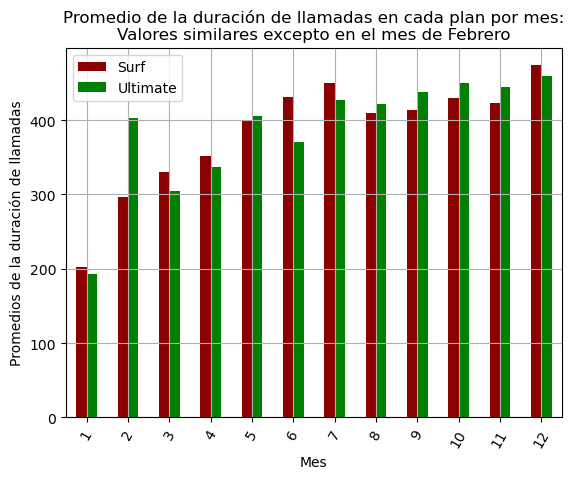

In [52]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#Se utiliza un filtro para obtener la información de los usuarios con el plan 'surf'.
surf_month=user_month_data[user_month_data["plan"]=="surf"]
#Mediante el método ".groupby()" se agrupa la información para calcular el promedio
#de la duración de las llamadas en cada mes de los usuarios con el plan 'surf'.
surf_month_calls_dur_prom=surf_month.groupby("month")["calls_duration"].mean()
#Se utiliza un filtro para obtener la información de los usuarios con el plan 'ultimate'.
ultimate_month=user_month_data[user_month_data["plan"]=="ultimate"]
#Mediante el método ".groupby()" se agrupa la información para calcular el promedio
#de la duración de las llamadas en cada mes de los usuarios con el plan 'ultimate'.
ultimate_month_calls_dur_prom=ultimate_month.groupby("month")["calls_duration"].mean()
#Mediante el método ".concat()" se unen las dos agrupaciones obtenidas.
month_calls_dur=pd.concat([surf_month_calls_dur_prom,ultimate_month_calls_dur_prom], axis="columns")
#Se renombran las columnas para facilitar la identificación de los promedios mensuales
#de la duración de llamadas de cada plan.
month_calls_dur.columns=["surf", "ultimate"]
#Se procede a generar un gráfico de barras.
month_calls_dur.plot(xlabel="Mes", ylabel="Promedios de la duración de llamadas", kind="bar", grid=True, rot=60, color=["darkred", "green"],
                     title="Promedio de la duración de llamadas en cada plan por mes:\nValores similares excepto en el mes de Febrero")
#Se asigna la leyenda para identificar las barras de cada plan.
plt.legend(["Surf", "Ultimate"])

A partir de la gráfica obtenida, podemos afirmar que en general el promedio de la duración de llamadas en cada mes de los dos planes es similar. Para la mayoría de los meses, la duración mensual de las llamadas está alrededor de los 400 minutos. El mes donde se presenta una diferencia notable en el promedio de la duración mensual de las llamadas entre los dos planes es en el mes de Febrero.

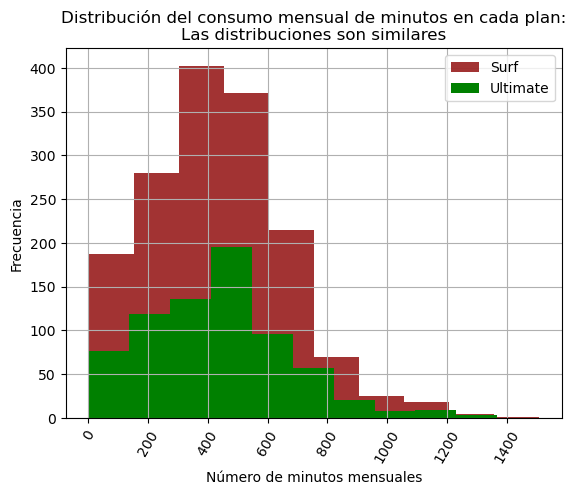

In [53]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#Se genera un histograma con la distribución del número de minutos mensuales
#utilizados por los usuarios en cada plan.
surf_month["calls_duration"].plot(kind="hist", color="darkred", alpha=0.8)
ultimate_month["calls_duration"].plot(kind="hist", color="green", alpha=1, xlabel="Número de minutos mensuales", ylabel="Frecuencia",
                                                title="Distribución del consumo mensual de minutos en cada plan:\nLas distribuciones son similares", grid=True, rot=60)
#Se asigna la leyenda para identificar las barras de cada plan.
plt.legend(["Surf", "Ultimate"])

Al observar la gráfica obtenida, podemos notar que las distibuciones son muy parecidas, por lo que esperaríamos que la media y la varianza sean similares. Evidentemente, se puede identificar por la frecuencia que la mayoría de los usuarios pertenecen al plan 'surf'. También, se puede evidenciar una cola a la derecha en ambas distribuciones, lo que indicaría un sesgo positivo y la existencia de valores atípicos.

In [54]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#Con el método ".mean()" se calcula el promedio de la duración mensual de llamadas
#de los usuarios del plan 'surf'.
surf_month_calls_dur_mean=surf_month["calls_duration"].mean()
#Con el método ".var()" se calcula la varianza de la duración mensual de llamadas
#de los usuarios del plan 'surf'.
surf_month_calls_dur_var=surf_month["calls_duration"].var()
#Se imprimen los resultados.
print("Plan 'Surf':\nMedia: {:.2f}\nVarianza: {:.2f}\n".format(surf_month_calls_dur_mean, surf_month_calls_dur_var))
#Con el método ".mean()" se calcula el promedio de la duración mensual de llamadas
#de los usuarios del plan 'surf'.
ultimate_month_calls_dur_mean=ultimate_month["calls_duration"].mean()
#Con el método ".var()" se calcula la varianza de la duración mensual de llamadas
#de los usuarios del plan 'surf'.
ultimate_month_calls_dur_var=ultimate_month["calls_duration"].var()
#Se imprimen los resultados.
print("Plan 'Ultimate':\nMedia: {:.2f}\nVarianza: {:.2f}".format(ultimate_month_calls_dur_mean, ultimate_month_calls_dur_var))

Plan 'Surf':
Media: 428.75
Varianza: 54968.28

Plan 'Ultimate':
Media: 430.45
Varianza: 57844.46


Como habíamos comentado anteriormente, el promedio y la varianza de ambas distribuciones son similares. De acuerdo con los promedios, podríamos afirmar en general el consumo de minutos mensuales podría ser cubierto con el plan 'surf'. Sin embargo, dado el sesgo positivo en las distribuciones podríamos esperar casos de usuarios de ambos planes con consumos mensuales superiores a los 500 minutos.

Text(0.5, 1.0, '')

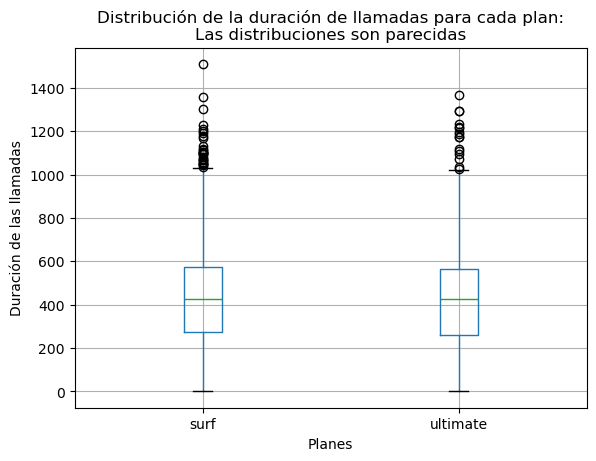

In [55]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
user_month_data.boxplot(column="calls_duration", by="plan", xlabel="Planes", ylabel="Duración de las llamadas")
#Se define el título principal
plt.suptitle("Distribución de la duración de llamadas para cada plan:\nLas distribuciones son parecidas")
#Se define el título secundario
plt.title("")

C:\Users\User\AppData\Local\Temp\ipykernel_9152\1029977601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="plan", y="calls_duration", data=user_month_data, palette=["darkred", "green"])


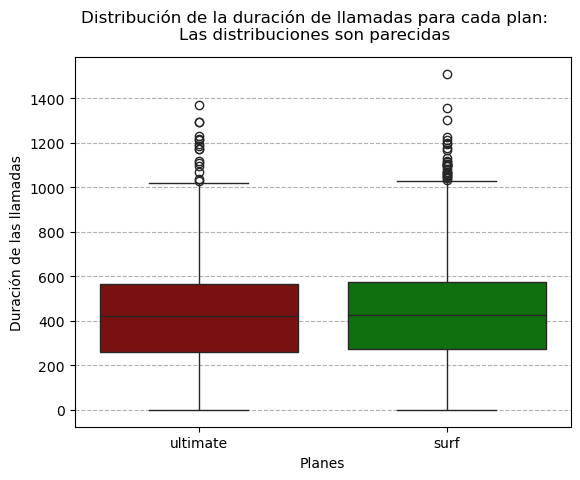

In [56]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
sns.boxplot(x="plan", y="calls_duration", data=user_month_data, palette=["darkred", "green"])
#Se define la etiqueta del eje x
plt.xlabel("Planes")
#Se define la etiqueta del eje y
plt.ylabel("Duración de las llamadas")
#Se define el título principal
plt.suptitle("Distribución de la duración de llamadas para cada plan:\nLas distribuciones son parecidas")
#Se define el título secundario
plt.title("")
#Se define la cuadrícula
plt.grid(True, axis="y", linestyle="--", alpha=1.0)

Podemos ver que en esta gráfica también se aprecia un patrón similar entre las distribuciones, como hemos visto en gráficas y estadísticas anteriores. Esta gráfica también nos permite verificar la existencia de valores atípicos. En ambos planes, hay usuarios con consumos mensuales de llamadas extremos que solo pueden ser cubiertos con el límite del plan 'ultimate' para este servicio.

**Conclusiones: Consumo mensual de minutos de los usuarios de cada plan**  
Teniendo en cuenta las gráficas y estadísticas presentadas, el comportamiento de los usuarios respecto a la duración mensual de las llamadas para los dos planes de telefonía es muy parecido. Teniendo en cuenta el promedio, el límite del plan 'surf' podría cubrir el consumo de este servicio para la mayoría de los usuarios. Pero dado que existen consumos atípicos que superan los 500 minutos, se recomendaría inscribirse al plan 'ultimate' para no incurrir en costos adicionales en este servicio.

### Mensajes

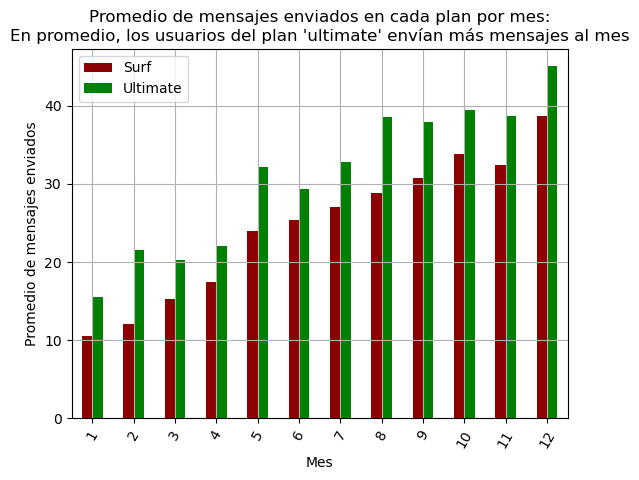

In [57]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
#Mediante el método ".groupby()" se agrupa la información para calcular el promedio
#del número de mensajes enviados en cada mes por los usuarios con el plan 'surf'.
surf_month_msg_prom=surf_month.groupby("month")["messages_num"].mean()
#Mediante el método ".groupby()" se agrupa la información para calcular el promedio
#del número de mensajes enviados en cada mes por los usuarios con el plan 'ultimate'.
ultimate_month_msg_prom=ultimate_month.groupby("month")["messages_num"].mean()
#Mediante el método ".concat()" se unen las dos agrupaciones obtenidas.
month_msg=pd.concat([surf_month_msg_prom,ultimate_month_msg_prom], axis="columns")
#Se renombran las columnas para facilitar la identificación de los promedios mensuales
#del número de mensajes enviados de cada plan.
month_msg.columns=["surf", "ultimate"]
#Se procede a generar un gráfico de barras.
month_msg.plot(xlabel="Mes", ylabel="Promedio de mensajes enviados", kind="bar", grid=True, rot=60, color=["darkred", "green"],
                     title="Promedio de mensajes enviados en cada plan por mes:\nEn promedio, los usuarios del plan 'ultimate' envían más mensajes al mes")
#Se asigna la leyenda para identificar las barras de cada plan.
plt.legend(["Surf", "Ultimate"])

A partir de la gráfica podemos observar que para cada mes, los usuarios del plan 'ultimate' envían más mensajes que los usuarios del plan 'surf'.

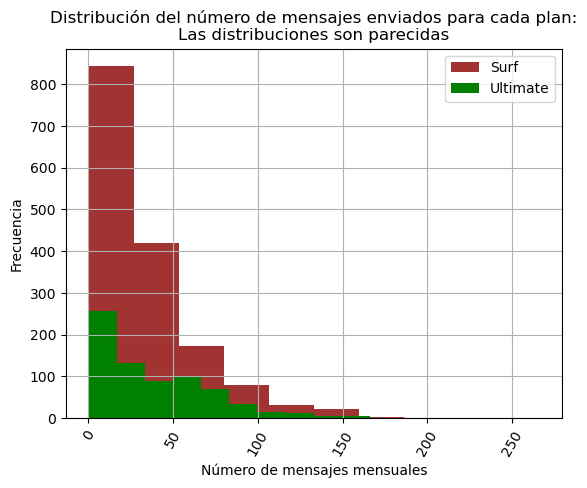

In [58]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
#Se genera un histograma con la distribución del número de mensajes enviados
#por los usuarios en cada plan.
surf_month["messages_num"].plot(kind="hist", color="darkred", alpha=0.8)
ultimate_month["messages_num"].plot(kind="hist", color="green", alpha=1, xlabel="Número de mensajes mensuales", ylabel="Frecuencia",
                                                title="Distribución del número de mensajes enviados para cada plan:\nLas distribuciones son parecidas", grid=True, rot=60)
#Se asigna la leyenda para identificar las barras de cada plan.
plt.legend(["Surf", "Ultimate"])

En esta gráfica podemos notar que las distibuciones son muy parecidas, por lo que esperaríamos que la media y la varianza sean similares. Por los valores de frecuencia se puede observar que la mayoría de los usuarios pertenecen al plan 'surf'. También, se puede evidenciar una cola a la derecha en ambas distribuciones, lo que indicaría un sesgo positivo y la existencia de valores atípicos.

In [59]:
#Con el método ".mean()" se calcula el promedio del número de mensajes enviados
#por los usuarios del plan 'surf'.
surf_month_msg_mean=surf_month["messages_num"].mean()
#Con el método ".var()" se calcula la varianza del número de mensajes enviados
#por los usuarios del plan 'surf'.
surf_month_msg_var=surf_month["messages_num"].var()
#Se imprimen los resultados.
print("Plan 'Surf':\nMedia: {:.2f}\nVarianza: {:.2f}\n".format(surf_month_msg_mean, surf_month_msg_var))
#Con el método ".mean()" se calcula el promedio del número de mensajes enviados
#por los usuarios del plan 'ultimate'.
ultimate_month_msg_mean=ultimate_month["messages_num"].mean()
#Con el método ".var()" se calcula la varianza del número de mensajes enviados
#por los usuarios del plan 'ultimate'.
ultimate_month_msg_var=ultimate_month["messages_num"].var()
#Se imprimen los resultados.
print("Plan 'Ultimate':\nMedia: {:.2f}\nVarianza: {:.2f}".format(ultimate_month_msg_mean, ultimate_month_msg_var))

Plan 'Surf':
Media: 31.16
Varianza: 1126.72

Plan 'Ultimate':
Media: 37.55
Varianza: 1208.76


Como esperábamos, el promedio y la varianza de ambas distribuciones son similares. De acuerdo con los promedios, podríamos afirmar en general el número de mensajes enviados mensualmente podría cubrirse con el límite del plan 'surf'. Sin embargo, dado el sesgo positivo en las distribuciones podríamos esperar casos de usuarios que envían más de 50 mensajes al mes.

Text(0.5, 1.0, '')

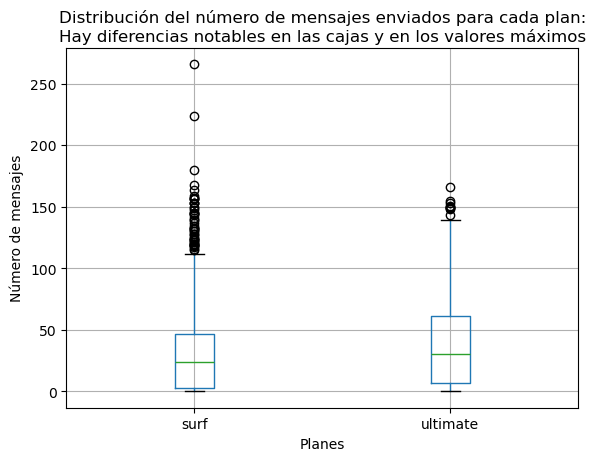

In [60]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
user_month_data.boxplot(column="messages_num", by="plan", xlabel="Planes", ylabel="Número de mensajes")
#Se define el título principal
plt.suptitle("Distribución del número de mensajes enviados para cada plan:\nHay diferencias notables en las cajas y en los valores máximos")
#Se define el título secundario
plt.title("")

C:\Users\User\AppData\Local\Temp\ipykernel_9152\2339120438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="plan", y="messages_num", data=user_month_data, palette=["darkred", "green"])


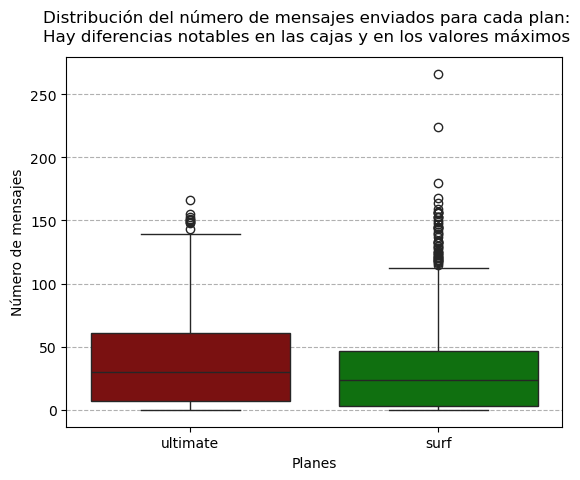

In [61]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
sns.boxplot(x="plan", y="messages_num", data=user_month_data, palette=["darkred", "green"])
#Se define la etiqueta del eje x
plt.xlabel("Planes")
#Se define la etiqueta del eje y
plt.ylabel("Número de mensajes")
#Se define el título principal
plt.suptitle("Distribución del número de mensajes enviados para cada plan:\nHay diferencias notables en las cajas y en los valores máximos")
#Se define el título secundario
plt.title("")
#Se define la cuadrícula
plt.grid(True, axis="y", linestyle="--", alpha=1.0)

Podríamos afirmar que las distribuciones a primera vista son similares, como hemos visto en gráficas y estadísticas anteriores, pero la caja superior en el plan 'ultimate' es notablemente más ancha que la caja inferior. Igualmente, el valor máximo en la distribución del plan 'ultimate' supera los 125 mensajes enviados. En la distribución del plan 'surf' podemos ver que las cajas tienen el mismo ancho y que el valor máximo no supera los 125 mensajes. En esta gráfica podemos confirmar la existencia de valores atípicos. En ambos planes, hay usuarios que envían más de 100 mensajes mensualmente, una cantidad que solo se puede cubrir con el límite del plan 'ultimate' para este servicio.

**Conclusiones: Número de mensajes enviados mensualmente por los usuarios de cada plan**  
A partir de las gráficas y estadísticas presentadas, a primera vista el comportamiento de los usuarios respecto al número de mensajes enviados mensualmente en los dos planes de telefonía es parecido. Sin embargo, como detallamos anteriormente en el gráfico de caja de las distribuciones para este servicio, se puede apreciar diferencias en el ancho de las cajas y los valores máximos entre ambas distribuciones. Esto tendría relación con la diferencia entre los promedios, como lo vimos también en el gráfico de barras donde el promedio de mensajes enviados en el plan 'ultimate' fue mayor al número del plan 'surf' en todos los meses. Para este servicio el plan 'surf' podría cubrir el número de mensajes enviados para la mayoría de los usuarios. Pero dado que existen consumos atípicos que superan los 50 mensajes, se recomendaría inscribirse al plan 'ultimate' para no incurrir en costos adicionales en este servicio.

### Internet

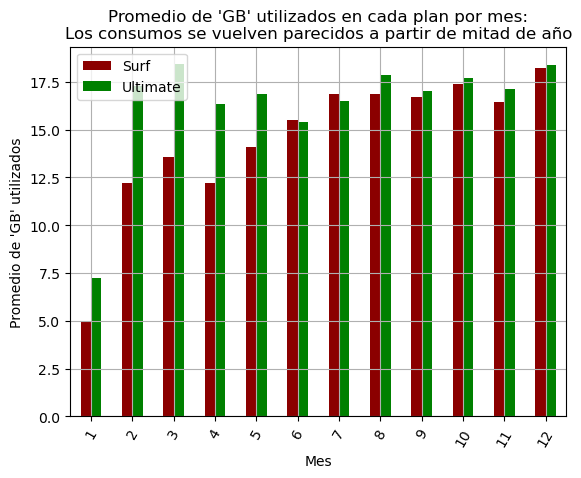

In [62]:
#Mediante el método ".groupby()" se agrupa la información para calcular el promedio
#de 'mb' utilizados en cada mes por los usuarios con el plan 'surf'.
surf_month_gb_prom=surf_month.groupby("month")["gb_volume"].mean()
#Mediante el método ".groupby()" se agrupa la información para calcular el promedio
#de 'mb' utilizados en cada mes por los usuarios con el plan 'ultimate'.
ultimate_month_gb_prom=ultimate_month.groupby("month")["gb_volume"].mean()
#Mediante el método ".concat()" se unen las dos agrupaciones obtenidas.
month_gb=pd.concat([surf_month_gb_prom,ultimate_month_gb_prom], axis="columns")
#Se renombran las columnas para facilitar la identificación de los promedios mensuales
#de 'mb' utilizados de cada plan.
month_gb.columns=["surf", "ultimate"]
#Se procede a generar un gráfico de barras.
month_gb.plot(xlabel="Mes", ylabel="Promedio de 'GB' utilizados", kind="bar", grid=True, rot=60, color=["darkred", "green"],
                     title="Promedio de 'GB' utilizados en cada plan por mes:\nLos consumos se vuelven parecidos a partir de mitad de año")
#Se asigna la leyenda para identificar las barras de cada plan.
plt.legend(["Surf", "Ultimate"])

En la gráfica podemos observar que en los primeros meses del año, existe un mayor consumo de internet en los usuarios del plan 'ultimate'. Alrededor de la mitad del año, los consumos se vuelven similares. En general, el consumo de los usuarios del plan 'ultimate' supera los 15 GB. Para la segunda mitad del año, los usuarios del plan 'surf' siguen esta tendencia, incurriendo en costos adicionales.

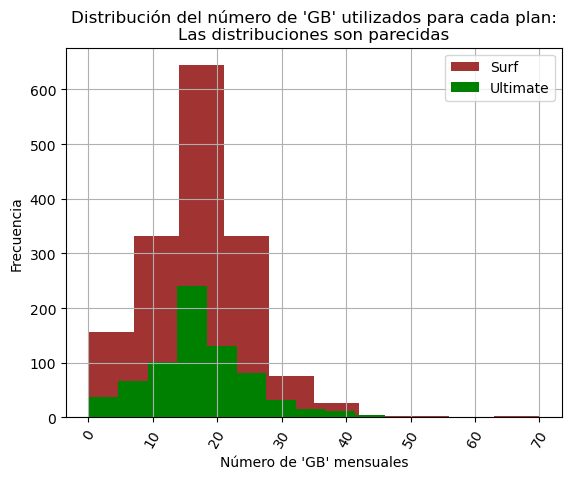

In [63]:
#Se genera un histograma con la distribución del número de 'mb' utilizados
#por los usuarios en cada plan.
surf_month["gb_volume"].plot(kind="hist", color="darkred", alpha=0.8)
ultimate_month["gb_volume"].plot(kind="hist", color="green", alpha=1, xlabel="Número de 'GB' mensuales", ylabel="Frecuencia",
                                                title="Distribución del número de 'GB' utilizados para cada plan:\nLas distribuciones son parecidas", grid=True, rot=60)
#Se asigna la leyenda para identificar las barras de cada plan.
plt.legend(["Surf", "Ultimate"])

En la gráfica podemos notar que nuevamente las distibuciones son muy parecidas, por lo que esperaríamos que la media y la varianza sean similares. Por los valores de frecuencia se puede observar que la mayoría de los usuarios pertenecen al plan 'surf'. También, se puede evidenciar una cola a la derecha en ambas distribuciones, lo que indicaría un sesgo positivo y la existencia de valores atípicos.

In [64]:
#Con el método ".mean()" se calcula el promedio de 'mb' utilizados
#por los usuarios del plan 'surf'.
surf_month_gb_mean=surf_month["gb_volume"].mean()
#Con el método ".var()" se calcula la varianza de 'mb' utilizados
#por los usuarios del plan 'surf'.
surf_month_gb_var=surf_month["gb_volume"].var()
#Se imprimen los resultados.
print("Plan 'Surf':\nMedia: {:.2f}\nVarianza: {:.2f}\n".format(surf_month_gb_mean, surf_month_gb_var))
#Con el método ".mean()" se calcula el promedio de 'mb' utilizados
#por los usuarios del plan 'ultimate'.
ultimate_month_gb_mean=ultimate_month["gb_volume"].mean()
#Con el método ".var()" se calcula la varianza de 'mb' utilizados
#por los usuarios del plan 'ultimate'.
ultimate_month_gb_var=ultimate_month["gb_volume"].var()
#Se imprimen los resultados.
print("Plan 'Ultimate':\nMedia: {:.2f}\nVarianza: {:.2f}".format(ultimate_month_gb_mean, ultimate_month_gb_var))

Plan 'Surf':
Media: 16.67
Varianza: 61.58

Plan 'Ultimate':
Media: 17.31
Varianza: 58.83


En efecto, el promedio y la varianza de ambas distribuciones son similares. De acuerdo con los promedios, podríamos afirmar en general, los usuarios del plan 'surf' exceden el límite de consumo de internet de su plan. Teniendo en cuenta el sesgo positivo en las distribuciones podríamos esperar casos de usuarios que gasten más de las 30GB que cubre el plan 'ultimate'.

Text(0.5, 1.0, '')

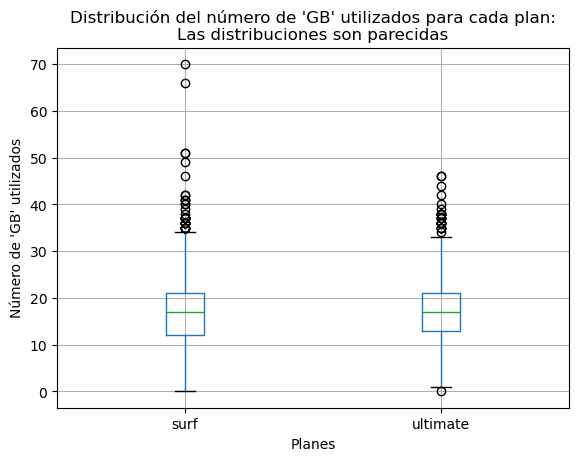

In [65]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
user_month_data.boxplot(column="gb_volume", by="plan", xlabel="Planes", ylabel="Número de 'GB' utilizados")
#Se define el título principal
plt.suptitle("Distribución del número de 'GB' utilizados para cada plan:\nLas distribuciones son parecidas")
#Se define el título secundario
plt.title("")

C:\Users\User\AppData\Local\Temp\ipykernel_9152\2416916495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="plan", y="gb_volume", data=user_month_data, palette=["darkred", "green"])


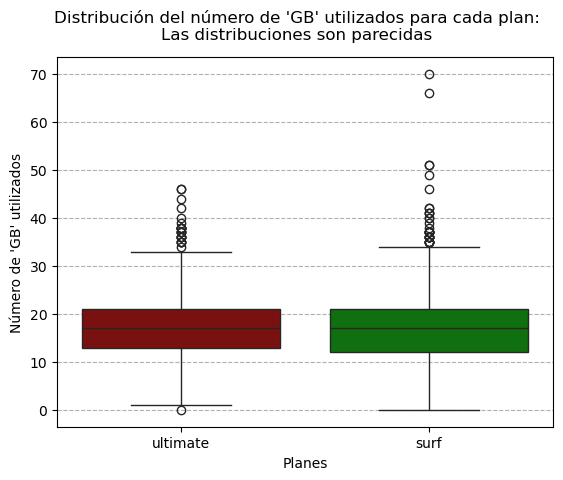

In [66]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
sns.boxplot(x="plan", y="gb_volume", data=user_month_data, palette=["darkred", "green"])
#Se define la etiqueta del eje x
plt.xlabel("Planes")
#Se define la etiqueta del eje y
plt.ylabel("Número de 'GB' utilizados")
#Se define el título principal
plt.suptitle("Distribución del número de 'GB' utilizados para cada plan:\nLas distribuciones son parecidas")
#Se define el título secundario
plt.title("")
#Se define la cuadrícula
plt.grid(True, axis="y", linestyle="--", alpha=1.0)

Podemos observar nuevamente en esta gráfica, que las distribuciones son similares, como hemos visto en gráficas y estadísticas anteriores. También, en esta gráfica podemos confirmar la existencia de valores atípicos. Particularmente, podemos observar que en la distribución del plan 'ultimate' existe un valor atípico por debajo del valor mínimo de la distribución. En ambos planes, hay usuarios que utilizan más de 30GB mensualmente. Esto indicaría que el internet es el servicio por el cual usuarios de ambos planes incurren en costos adicionales.



**Conclusiones: Consumo mensual de 'GB' de internet de los usuarios de cada plan:**  
Con las gráficas y estadísticas obtenidas, se puede observar que el comportamiento de los usuarios respecto al consumo de GB de internet para los dos planes de telefonía es muy similar. Para este servicio el plan 'surf' sería insuficiente para cubrir el consumo para la mayoría de los usuarios. Por lo tanto se espera, que para muchos de los usuarios del plan 'surf' hayan costos adicionales por consumos superiores al límite de 15 GB de internet. En este caso, sería recomendable inscribirse al plan 'ultimate' para no incurrir en costos adicionales excesivos en este servicio.

## Ingreso

Luego de estudiar el comportamiento de los usuarios, vamos a determinar como sus patrones de consumo mensuales de cada servicio impactan el ingreso mensual para cada plan de telefonía.

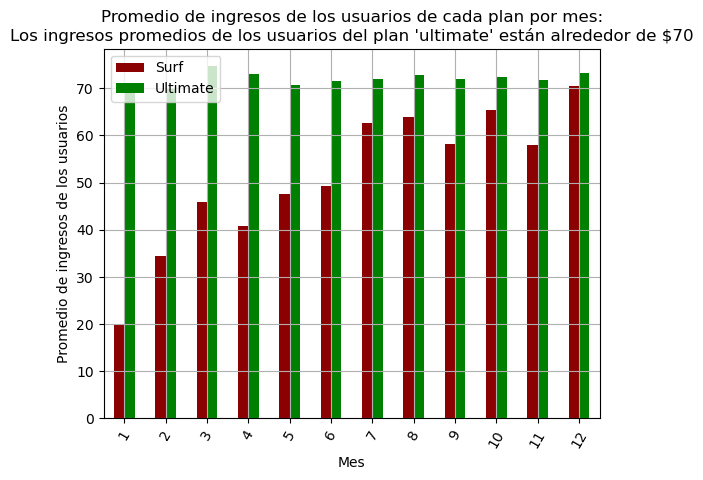

In [67]:
#Mediante el método ".groupby()" se agrupa la información para calcular el promedio
#mensual de ingresos de los usuarios del plan'surf'.
surf_month_in_prom=surf_month.groupby("month")["income"].mean()
#Mediante el método ".groupby()" se agrupa la información para calcular el promedio
#mensual de ingresos de los usuarios del plan'ultimate'.
ultimate_month_in_prom=ultimate_month.groupby("month")["income"].mean()
#Mediante el método ".concat()" se unen las dos agrupaciones obtenidas.
month_in=pd.concat([surf_month_in_prom,ultimate_month_in_prom], axis="columns")
#Se renombran las columnas para facilitar la identificación de los promedios mensuales
#de ingresos de los usuarios de cada plan.
month_in.columns=["surf", "ultimate"]
#Se procede a generar un gráfico de barras.
month_in.plot(xlabel="Mes", ylabel="Promedio de ingresos de los usuarios", kind="bar", grid=True, rot=60, color=["darkred", "green"],
                     title="Promedio de ingresos de los usuarios de cada plan por mes:\nLos ingresos promedios de los usuarios del plan 'ultimate' están alrededor de $70")
#Se asigna la leyenda para identificar las barras de cada plan.
plt.legend(["Surf", "Ultimate"])

En la gráfica observamos que el promedio de los ingresos mensuales de los usuarios del plan 'ultimate' está alrededor de los \$70 en todos los meses. Para el caso de los usuarios del plan 'surf', solo en el primer mes el promedio de ingresos es de \$20. Para el resto de los meses, el promedio siempre supera los \$30, indicando costos adicionales considerables por superar los límites de los servicios incluidos en el plan.

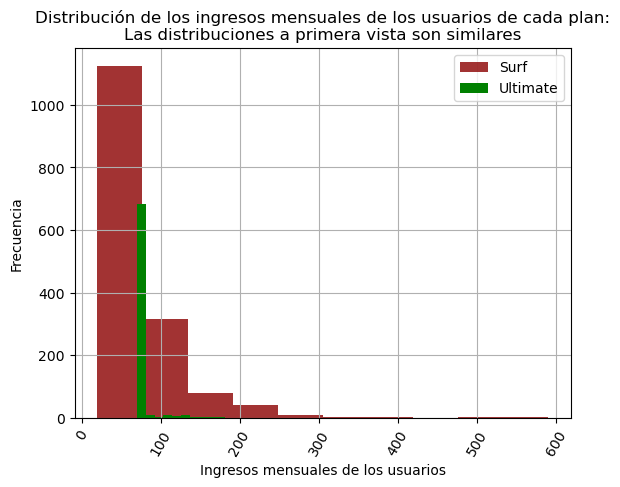

In [68]:
#Se genera un histograma con la distribución de los ingresos mensuales
#de los usuarios en cada plan.
surf_month["income"].plot(kind="hist", color="darkred", alpha=0.8)
ultimate_month["income"].plot(kind="hist", color="green", alpha=1, xlabel="Ingresos mensuales de los usuarios", ylabel="Frecuencia",
                                                title="Distribución de los ingresos mensuales de los usuarios de cada plan:\nLas distribuciones a primera vista son similares", grid=True, rot=60)
#Se asigna la leyenda para identificar las barras de cada plan.
plt.legend(["Surf", "Ultimate"])

Al observar la gráfica podríamos decir que las distribuciones son muy parecidas, pero teniendo en cuenta la gráfica anterior, es muy posible que los promedios y varianzas no sean similares. Por los valores de frecuencia se puede observar que la mayoría de los usuarios pertenecen al plan 'surf'. También, se puede evidenciar una cola a la derecha en ambas distribuciones, lo que indicaría un sesgo positivo y la existencia de valores atípicos.

In [69]:
#Con el método ".mean()" se calcula el promedio de los ingresos
#de los usuarios del plan 'surf'.
surf_month_in_mean=surf_month["income"].mean()
#Con el método ".var()" se calcula la varianza de los ingresos
#de los usuarios del plan 'surf'.
surf_month_in_var=surf_month["income"].var()
#Se imprimen los resultados.
print("Plan 'Surf':\nMedia: {:.2f}\nVarianza: {:.2f}\n".format(surf_month_in_mean, surf_month_in_var))
#Con el método ".mean()" se calcula el promedio de los ingresos
#de los usuarios del plan 'ultimate'.
ultimate_month_in_mean=ultimate_month["income"].mean()
#Con el método ".var()" se calcula la varianza de los ingresos
#de los usuarios del plan 'ultimate'.
ultimate_month_in_var=ultimate_month["income"].var()
#Se imprimen los resultados.
print("Plan 'Ultimate':\nMedia: {:.2f}\nVarianza: {:.2f}".format(ultimate_month_in_mean, ultimate_month_in_var))

Plan 'Surf':
Media: 60.71
Varianza: 3067.84

Plan 'Ultimate':
Media: 72.31
Varianza: 129.85


Como se había comentado anteriormente, los valores de promedios y varianzas no son similares. El promedio de ingresos mensuales de los usuarios del plan 'ultimate' es cercano al valor mensual del plan (\$70), pero en el caso de los usuarios del plan 'surf' el ingreso mensual promedio es el triple del valor mensual del plan (\$20). También observamos que la varianza de los ingresos mensuales para los usuarios del plan 'surf' es considerablemente mayor que la varianza para los ususarios del plan 'ultimate'. Esto indicaría una mayor dispersión en la distribución de los ingresos mensuales de los usuarios del plan 'surf'.

Text(0.5, 1.0, '')

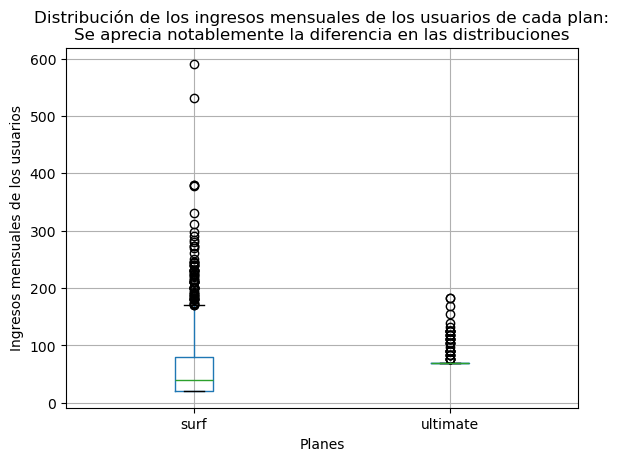

In [70]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
user_month_data.boxplot(column="income", by="plan", xlabel="Planes", ylabel="Ingresos mensuales de los usuarios")
#Se define el título principal
plt.suptitle("Distribución de los ingresos mensuales de los usuarios de cada plan:\nSe aprecia notablemente la diferencia en las distribuciones")
#Se define el título secundario
plt.title("")

C:\Users\User\AppData\Local\Temp\ipykernel_9152\3097740959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="plan", y="income", data=user_month_data, palette=["darkred", "green"])


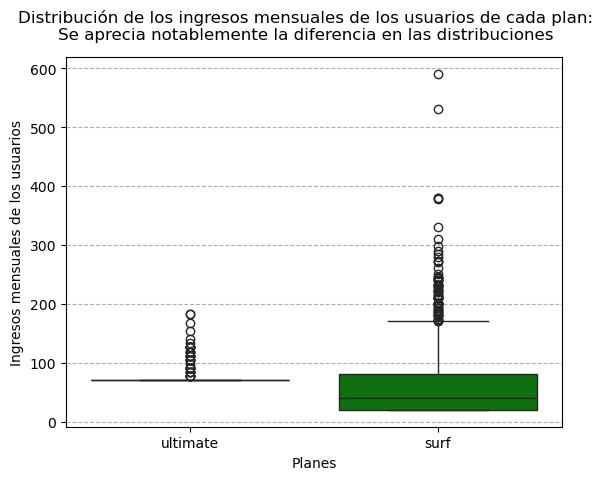

In [71]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
sns.boxplot(x="plan", y="income", data=user_month_data, palette=["darkred", "green"])
#Se define la etiqueta del eje x
plt.xlabel("Planes")
#Se define la etiqueta del eje y
plt.ylabel("Ingresos mensuales de los usuarios")
#Se define el título principal
plt.suptitle("Distribución de los ingresos mensuales de los usuarios de cada plan:\nSe aprecia notablemente la diferencia en las distribuciones")
#Se define el título secundario
plt.title("")
#Se define la cuadrícula
plt.grid(True, axis="y", linestyle="--", alpha=1.0)

En esta gráfica podemos confirmar la existencia de valores atípicos. Para la distribución de los ingresos mensuales de los usuarios del plan 'ultimate' confirmamos que la mayoría de los registros se encuentran concentrados alrededor de los \$70. En el caso de la distribución de los ingresos mensuales de los usuarios del plan 'surf', podemos ver que existe un mayor grado de dispersión y que la mayoría de los registros superan los \$20 y en algunos casos extremos superan incluso los \$200.

**Conclusiones: Ingresos promedios mensuales de los usuarios de cada plan**  
Se puede concluir a partir de las gráficas y estadísticas presentadas que las distribuciones de ingresos mensuales de los planes no son similares. En el caso del plan 'ultimate' no se presenta mucha variación respecto al valor base del plan. Esto se puede apreciar en la gráfica de barras y en la gráfica de caja. Adicionalmente, podemos ver que la varianza no es tan alta como en el otro plan. Esto indica que son muy pocos los usuarios que exceden los límites de consumo de los servicios de telefonía. Para el plan 'surf' se puede observar una mayor variación en los ingresos mensuales y que en la mayoría de los casos supera notablemente el valor base del plan. Este comportamiento debe ser causado porque los usuarios superan excesivamente los límites de los servicios, lo que genera el aumento sustancial del ingreso mensual. Comparando los resultados para cada servicio, el consumo de internet debe ser el que genera un aumento de mayor magnitud teniendo en cuenta que la mayoría de los promedios mensuales y el promedio de la distribución en el plan 'surf' superan el límite de 15 GB.

## Prueba las hipótesis estadísticas

**Ingresos promedios mensuales de cada plan**  
Ahora vamos a determinar estadísticamente si hay diferencia significativa entre los promedios de los ingresos mensuales de los usuarios de los planes de telefonía 'surf' y 'ultimate'. A continuación, presentamos la formulación de la prueba de hipótesis que se llevará a cabo.  
**Prueba de hipótesis.**  
**Hipótesis Nula $H_{0}$**: El ingreso promedio de los usuarios del plan de telefonía *surf* es igual al ingreso promedio de los usuarios del plan de telefonía *ultimate*.   
**Hipótesis Alternativa $H_{1}$**: El ingreso promedio de los usuarios del plan de telefonía *surf* es diferente al ingreso promedio de los usuarios del plan de telefonía *ultimate*.  
**Prueba estadística**: Prueba *t* bilateral.  
**Valor alfa**: $\alpha=0.01$

In [72]:
# Prueba las hipótesis
#H_0: Los promedios son iguales
#H_1: Los promedios son diferentes
#t-student/dos colas
#Valor de alpha
alpha=0.01
#Prueba t-student para los promedios de dos muestras diferentes
user_income_mean=st.ttest_ind(surf_month["income"], ultimate_month["income"], equal_var=False)
#Comparación p-vlue y alpha
if user_income_mean.pvalue<alpha:
  print("Se rechaza H\N{SUBSCRIPT ZERO}")
else:
  print("No se rechaza H\N{SUBSCRIPT ZERO}")
#Hay diferencia significativa
#Los promedios son diferentes
#user_income_mean.pvalue

Se rechaza H₀


De acuerdo con la prueba de hipótesis realizada, se rechaza la hipótesis nula $H_{0}$ dado que existe diferencia estadísticamente significativa entre los dos ingresos promedios. Por lo tanto, se prueba que los ingresos promedio de los usuarios del plan 'surf' son diferentes a los ingresos promedio de los usuarios del plan 'ultimate'. Para esta prueba definimos el parámetro 'equal_var' igual a *False*, dado que conocíamos previamente que las varianzas eran notablemente diferentes.

**Ingresos promedios mensuales del área NY-NJ y otras regiones**  
Adicionalmente, vamos a comprobar estadísticamente si hay diferencia significativa entre los promedios de los ingresos mensuales de los usuarios que pertenecen al área 'NY-NJ' y los usuarios de otras regiones. Como hicimos anteriormente, presentamos la formulación de la prueba de hipótesis que se llevará a cabo.  
**Prueba de hipótesis.**  
**Hipótesis Nula $H_{0}$**: El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otra regiones.   
**Hipótesis Alternativa $H_{1}$**: El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otra regiones.   
**Prueba estadística**: Prueba *t* bilateral.  
**Valor alfa**: $\alpha=0.01$

In [73]:
#Definimos el valor de la columna "city" que corresponde a los usuarios del área NY-NJ
NY_NJ="New York-Newark-Jersey City, NY-NJ-PA MSA"
#Mediante un filtro obtenemos un dataframe con la información de los usuarios del área NY-NJ
NY_NJ_pop_data=user_month_data[user_month_data["city"]==NY_NJ]
#Mediante un filtro obtenemos un dataframe con la información de los usuarios
#que pertenecen a las otras regiones
other_msa_pop_data=user_month_data[user_month_data["city"]!=NY_NJ]

In [74]:
# Prueba las hipótesis
#H_0: Los promedios son iguales
#H_1: Los promedios son diferentes
#t-student/dos colas
#Valor de alpha
alpha=0.01
#Prueba t-student para los promedios de dos muestras diferentes
msa_income_mean=st.ttest_ind(NY_NJ_pop_data["income"], other_msa_pop_data["income"], equal_var=True)
#Comparación p-vlue y alpha
if msa_income_mean.pvalue<alpha:
  print("Se rechaza H\N{SUBSCRIPT ZERO}")
else:
  print("No se rechaza H\N{SUBSCRIPT ZERO}")
#Hay diferencia significativa
#Los promedios son diferentes
#msa_income_mean.pvalue

No se rechaza H₀


De acuerdo con la prueba de hipótesis realizada, no existe una diferencia estadísticamente significativa entre los dos ingresos promedios que nos permita rechazar la hipótesis nula $H_{0}$. Por lo tanto, no es posible afirmar que los ingresos promedio de los usuarios del área NY-NJ son diferentes a los ingresos promedio de los usuarios del resto de áreas. Para esta prueba definimos el parámetro 'equal_var' igual a *True*, partiendo de la suposición de que ambas distribuciones tienen parámetros similares.

## Conclusión general
1. No hubo necesidad de pre-procesar extensamente los datos dado que los nombres de las columnas tenían el formato apropiado,  no habían registros duplicados y de todos los dataframes solo uno contaba con una columna con valores ausentes. En este caso, no se reemplazaron porque es la manera de indicar que el usuario se encuentra activo. En caso de ser necesario evaluar alguna estadística con fechas de desactivación o usuarios activos, se hubieran reemplazado para facilitar el acceso y extracción de datos correspondientes.
2. Particularmente se concentraron esfuerzos en convertir todas las columnas con información de fechas al tipo de dato 'datetime'. De esta manera se facilitó el acceso y extracción de estadísticas mensuales para el comportamiento de los usuarios.
3. Se observó que en general se repetían los patrones de consumos de los usuarios para los servicios estudiados de cada plan. A pesar de esto, los ingresos promedio mensuales de cada plan diferían notablemente.
4. Con una prueba estadística se comprobó que los ingresos promedios mensuales para cada plan son diferentes. De acuerdo con las gráficas y estadísticas calculadas, se puede afirmar que el plan que genera mayor cantidad de ingresos promedios es el plan 'ultimate'. Aún así, se podría plantear una prueba adicional para verificar estadísticamente que el ingreso promedio mensual del plan 'ultimate' es significativamente mayor que el ingreso promedio mensual del plan 'surf'.
5. Se concluye que el presupuesto de publicidad debería ser destinado a promover que tanto usuarios nuevos como pertenecientes al plan 'surf' tomen el plan 'ultimate'. Se puede presentar información que demuestre que con el plan 'ultimate' se pueden reducir los costos adicionales por excesos en los consumos de servicio. Así el operador aumentará sus ingresos con el incremento de usuarios con el plan 'ultimate', partiendo solo del costo base del plan.
6. Respecto al análisis entre los ingresos promedios mensuales entre regiones del país, vemos que significativamente no hay diferencia. Esto puede deberse a que la proporción de usuarios con el plan 'surf' y 'ultimate' es muy parecida entre las regiones. Este acercamiento inicial indicaría que no se debería presentar una campaña publicitaria específica para cada región. Sin embargo, se podría hacer un análisis de los comportamientos de los usuarios por región para tener mayor certeza. Lo anterior sería útil también para realizar pruebas estadísticas. En esta en particular se asumió que las varianzas entre las dos muestras eran iguales dado que no teníamos información estadística disponible y suponemos que la ubicación geográfica no implica cambios en los consumos estándares de los usuarios.